<a href="https://colab.research.google.com/github/PeruVinayak/Data_Analysis_Netflix/blob/main/Netflix_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Case Study**

**About Netflix:**

*  Netflix is one of the most popular media and video streaming platforms. They
have over 8000 movies or tv shows available on their platform, as of mid-2021,
they have over 200M Subscribers globally.

**Business Problem:**

*  This business case focuses on the Netflix show data and provides
insightful information on 8807 shows

*  Analyzing the data and generating insights helps Netflix decide which type of shows/movies to produce and how to grow the business.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import PIL.Image

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isna().sum() # Finding missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df[df.duplicated()] # Duplicate check and found that there are no duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df['date_added_1'] = pd.to_datetime(df.date_added)
df['year'] = df.date_added_1.dt.year
df['month'] = df.date_added_1.dt.month
df['week'] = df.date_added_1.dt.week

missing_dates = df[df.date_added.isna()].index.values # Identifying the records which has NaN values from date_added column
df_1=df.drop(missing_dates) # creating new dataframe with year,month and week columns as integer

df_1['date_added_1'] = pd.to_datetime(df_1.date_added)
df_1['year'] = df_1.date_added_1.dt.year
df_1['month'] = df_1.date_added_1.dt.month
df_1['week'] = df_1.date_added_1.dt.week

<ipython-input-86-c4da012f99fc>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df.date_added_1.dt.week
<ipython-input-86-c4da012f99fc>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_1['week'] = df_1.date_added_1.dt.week


In [ ]:
df.director.fillna(value='Unknown Director',inplace= True)
df.cast.fillna(value='Unknown Cast',inplace= True)
df.rating.fillna(value='Unknown',inplace=True)

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_1,year,month,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,9.0,38.0
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,9.0,38.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,9.0,38.0


In [ ]:
# Creating multiple dataframes as we may have to use them later
df['country_split'] = df.country.str.split(', ')
df_c = df.explode('country_split')
unknown_countries = df_c[df_c.country.isna()].index.values
df_c.drop(unknown_countries,inplace=True) # Dropping the records which doesn't have country information
df_c['country_split']=df_c.country_split.str.replace('United States,','United States') # Replacing typo error

df.drop(columns='country_split',inplace=True) # Dropping country_split column to refrain original dataframe

df['director_split'] = df.director.str.split(', ')
df_d = df.explode('director_split')
df.drop(columns='director_split',inplace=True) # Dropping director_split column to refrain original dataframe

df['cast_split'] = df.cast.str.split(', ')
df_a = df.explode('cast_split')
df.drop(columns='cast_split',inplace=True) # Dropping cast_split column to refrain original dataframe

df['listed_in_split'] = df.listed_in.str.split(', ')
df_l = df.explode('listed_in_split')
df.drop(columns='listed_in_split',inplace=True) # Dropping listed_in_split column to refrain original dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   object        
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  date_added_1  8797 non-null   datetime64[ns]
 13  year          8797 non-null   float64       
 14  month         8797 non-null   float64       
 15  week          8797 non-null   float64 

**1.**  **Find the counts of each categorical variable both using graphical and nongraphical analysis.**

    a. Non-graphical Analysis:
    b. Graphical analysis:

**a. Non-graphical Analysis:**


In [ ]:
print('\033[1m Type of show: \033[1m')
df['type'].value_counts().reset_index().rename({'index':'Type','type':'Count'},axis=1)

 Type of show: 


,Type,Count
0,Movie,6131
1,TV Show,2676


In [ ]:
print('\033[1m Top 10 Customer ratings: \033[1m')
top_10_cust_ratings = df['rating'].value_counts().head(10).reset_index().rename({'index':'Rating','rating':'Count'},axis=1)
top_10_cust_ratings

 Top 10 Customer ratings: 


,Rating,Count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [ ]:
print('\033[1m Top 10 Movie/show directors: \033[1m')
top_10_directors = df_d['director_split'].value_counts().head(11)[1:].reset_index().rename({'index':'Director','director_split':'Movie_count'},axis=1)
top_10_directors

 Top 10 Movie/show directors: 


,Director,Movie_count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


In [ ]:
print('\033[1m Top 10 countries where the movie/show produced: \033[1m')
top_10_countries = df_c['country_split'].value_counts().head(10).reset_index().rename({'index':'Country','country_split':'Movie_count'},axis=1)
top_10_countries

 Top 10 countries where the movie/show produced: 


,Country,Movie_count
0,United States,3690
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


In [ ]:
print('\033[1m Top 10 Actors involved in the movie/show: \033[1m')
top_10_actors = df_a['cast_split'].value_counts().head(11)[1:].reset_index().rename({'index':'Actor','cast_split':'Movie_count'},axis=1)
top_10_actors

 Top 10 Actors involved in the movie/show: 


,Actor,Movie_count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


In [ ]:
print('\033[1m Top 10 Genres of the movie/show: \033[1m')
top_10_genres = df_l['listed_in_split'].value_counts().head(10).reset_index().rename({'index':'Genre','listed_in_split':'Movie_count'},axis=1)
top_10_genres

 Top 10 Genres of the movie/show: 


,Genre,Movie_count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


**b. Graphical analysis:**


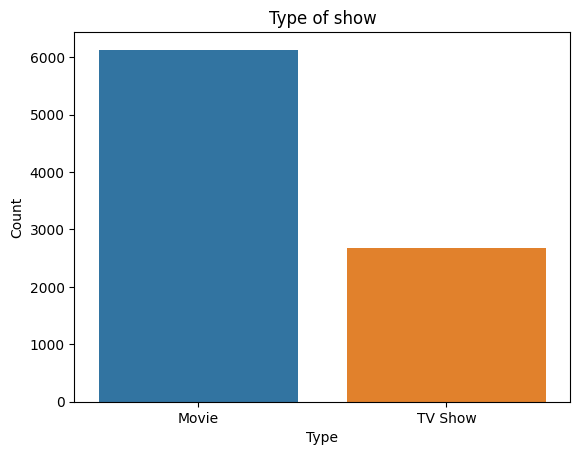

In [ ]:
sns.countplot(data=df,x='type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type of show')

plt.show()

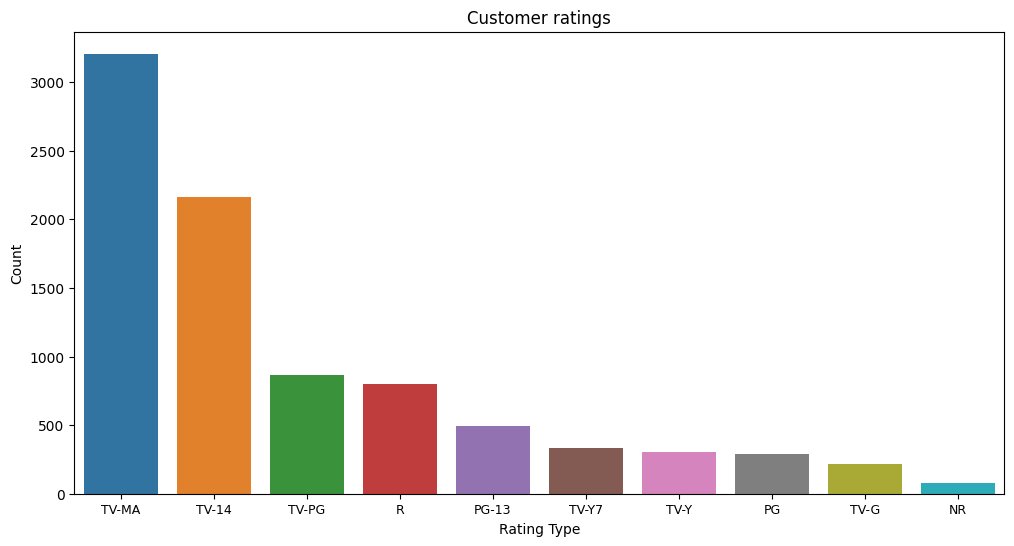

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(data=top_10_cust_ratings,x='Rating',y='Count',)
plt.xticks(fontsize=9)
plt.xlabel('Rating Type')
plt.ylabel('Count')
plt.title('Customer ratings')

plt.show()

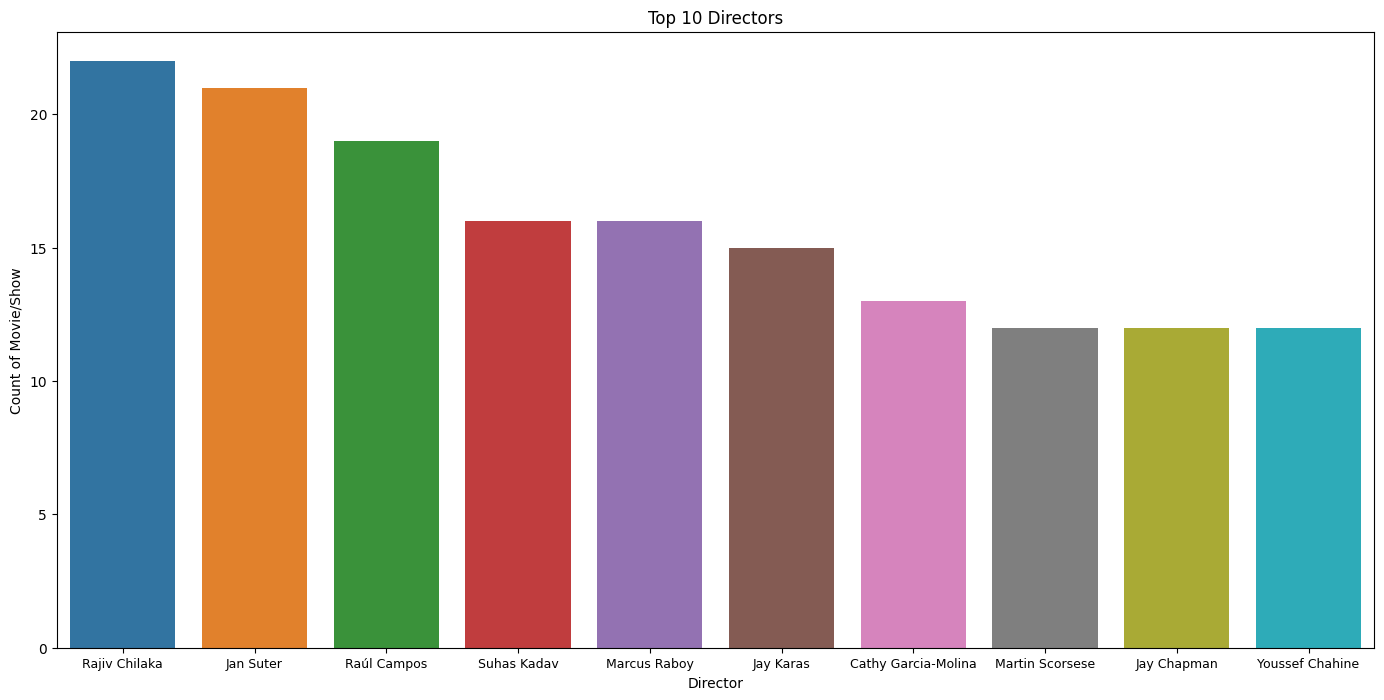

In [ ]:
plt.figure(figsize=(17,8))

sns.barplot(data =top_10_directors,x='Director',y='Movie_count')
plt.xticks(fontsize=9)
plt.xlabel('Director')
plt.ylabel('Count of Movie/Show')
plt.title('Top 10 Directors')

plt.show()

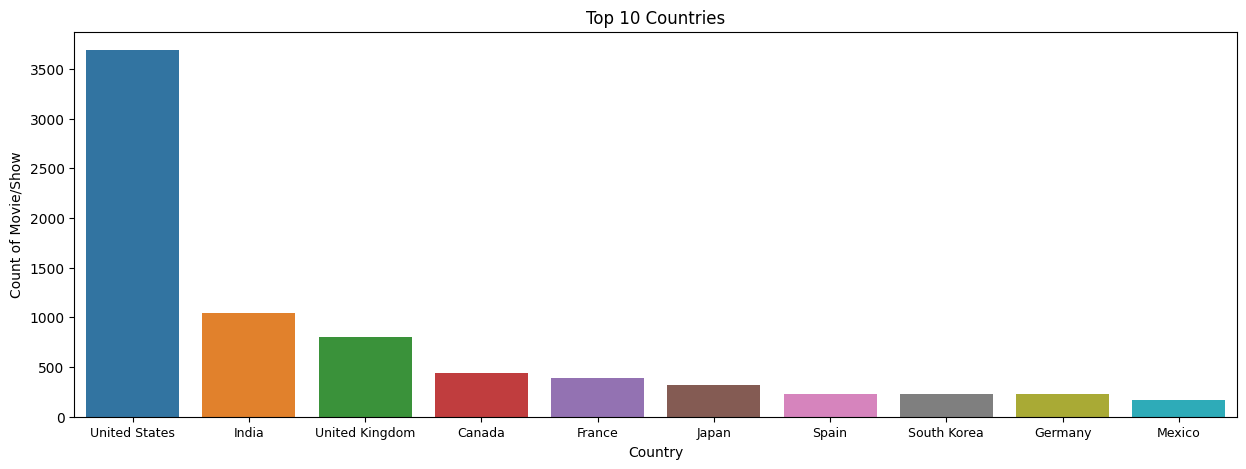

In [ ]:
plt.figure(figsize=(15,5))

sns.barplot(data =top_10_countries,x='Country',y='Movie_count')
plt.xticks(fontsize=9)
plt.xlabel('Country')
plt.ylabel('Count of Movie/Show')
plt.title('Top 10 Countries')

plt.show()

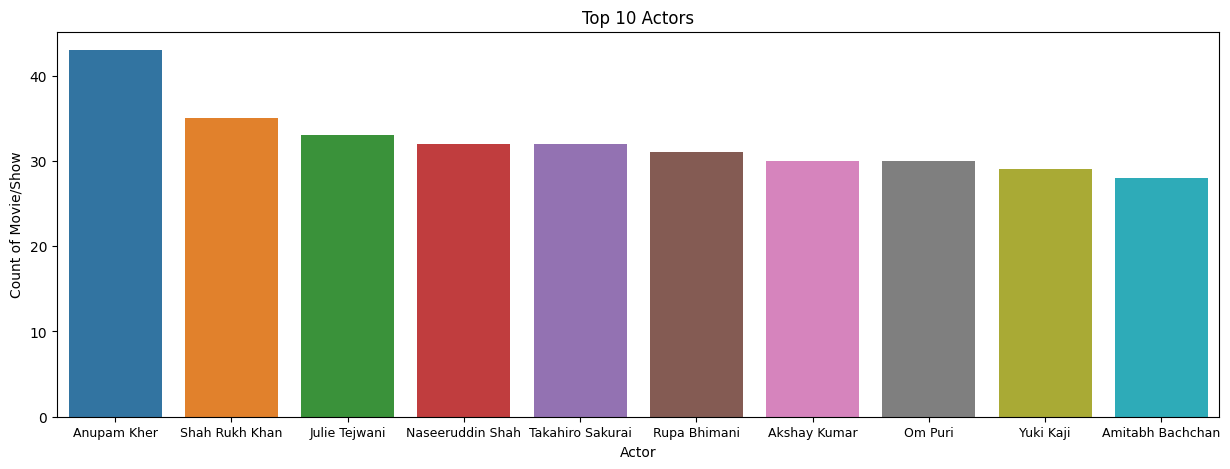

In [ ]:
plt.figure(figsize=(15,5))

sns.barplot(data =top_10_actors,x='Actor',y='Movie_count')
plt.xticks(fontsize=9)
plt.xlabel('Actor')
plt.ylabel('Count of Movie/Show')
plt.title('Top 10 Actors')

plt.show()

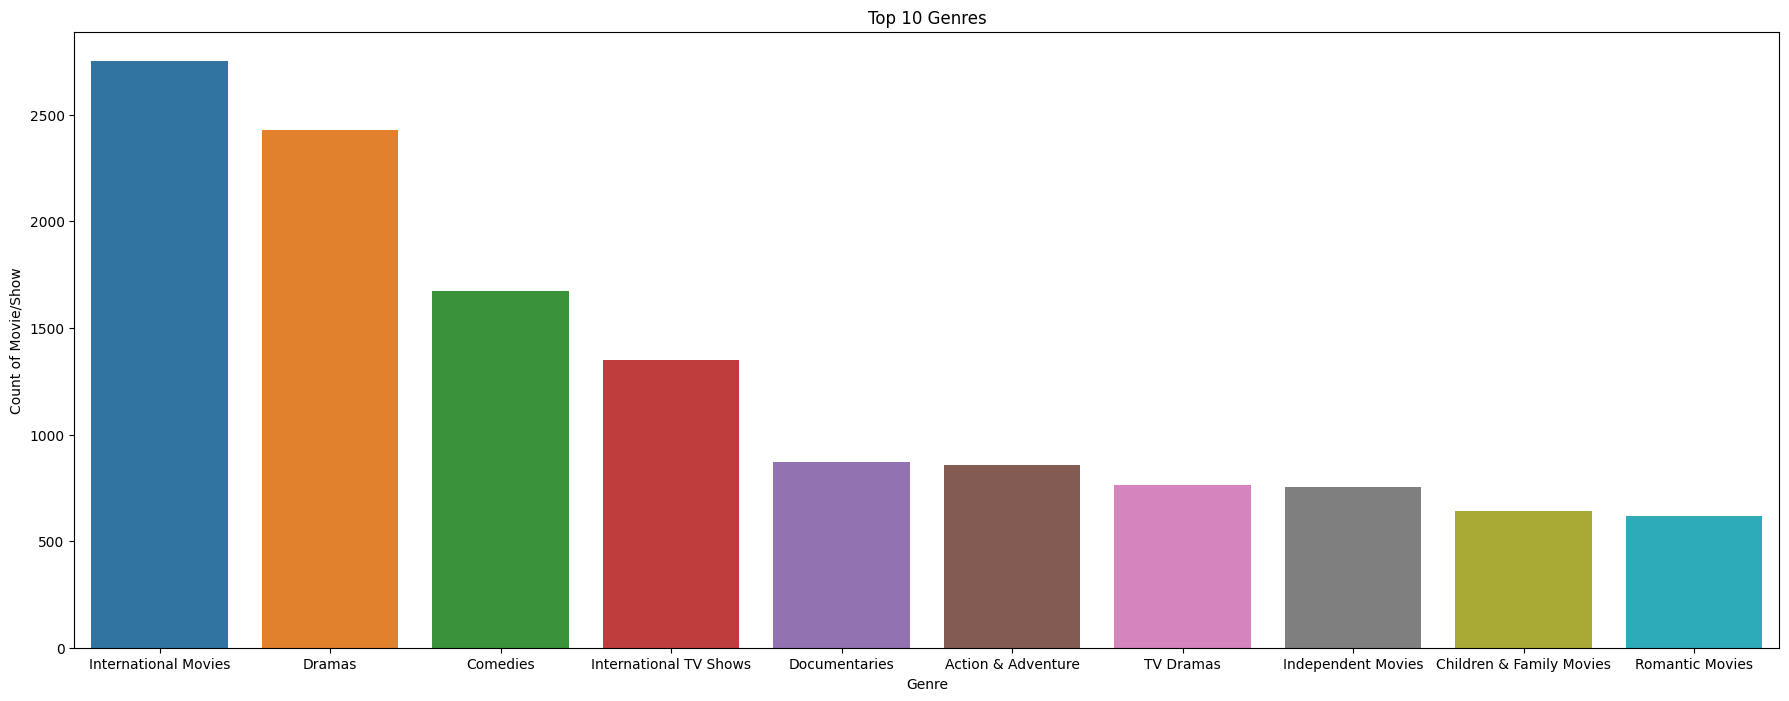

In [ ]:
plt.figure(figsize=(22,8))

sns.barplot(data =top_10_genres,x='Genre',y='Movie_count')
plt.xlabel('Genre')
plt.ylabel('Count of Movie/Show')
plt.title('Top 10 Genres')

plt.show()

**2. Comparison of tv shows vs. movies.**
    
    a. Find the number of movies produced in each country and pick the top 10 countries.

    b. Find the number of Tv-Shows produced in each country and pick the top 10
    countries.

**a. Find the number of movies produced in each country and pick the top 10 countries.**


In [ ]:
df_c_movies = df_c[df_c['type'] == 'Movie']
df_c_movies.groupby(['country_split']).title.nunique().sort_values(ascending=False)[:10].reset_index().rename({'country_split':'Country','title':'Movie_count'},axis=1)

,Country,Movie_count
0,United States,2752
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


**b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.**


In [ ]:
df_c_tv_show = df_c[df_c['type'] == 'TV Show']
df_c_tv_show.groupby(['country_split']).title.nunique().sort_values(ascending=False)[:10].reset_index().rename({'country_split':'Country','title':'TV_Show_count'},axis=1)

,Country,TV_Show_count
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,66
9,Spain,61


**3. What is the best time to launch a TV show?**

    a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies
    
    b. Find which is the best month to release the Tv-show or the movie. Do the
    analysis separately for Tv-shows and Movies

**a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies**


In [ ]:
df_1_movies = df_1[df_1['type'] == 'Movie']
missing_dates = df_1_movies[df_1_movies.date_added.isna()].index.values # Identify the records which has NaN values from date_added column
df_1_movies.drop(missing_dates,inplace=True)

df_1_movies.week.value_counts().head(10).reset_index().rename({'index':'Week','week':'Movie_count'},axis=1)

<ipython-input-104-b0fa8ce05f3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_movies.drop(missing_dates,inplace=True)


,Week,Movie_count
0,1,316
1,44,243
2,40,215
3,9,207
4,26,195
5,35,189
6,31,185
7,13,174
8,18,173
9,27,154


In [ ]:
df_1_tv_show = df_1[df_1['type'] == 'TV Show']
missing_dates = df_1_tv_show[df_1_tv_show.date_added.isna()].index.values # Identify the records which has NaN values from date_added column
df_1_tv_show.drop(missing_dates,inplace=True)

df_1_tv_show.week.value_counts().head(10).reset_index().rename({'index':'Week','week':'TV_Show_count'},axis=1)

<ipython-input-105-0280a165f0e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_tv_show.drop(missing_dates,inplace=True)


,Week,TV_Show_count
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75
5,35,74
6,26,73
7,5,73
8,40,72
9,50,70


**b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies**


In [ ]:
df_1_movies.month.value_counts().head(10).reset_index().rename({'index':'Month','month':'Movie_count'},axis=1)

,Month,Movie_count
0,7,565
1,4,550
2,12,547
3,1,546
4,10,545
5,3,529
6,9,519
7,8,519
8,11,498
9,6,492


In [ ]:
df_1_tv_show.month.value_counts().head(10).reset_index().rename({'index':'Month','month':'TV_Show_count'},axis=1)

,Month,TV_Show_count
0,12,266
1,7,262
2,9,251
3,8,236
4,6,236
5,10,215
6,4,214
7,3,213
8,11,207
9,5,193


**4. Analysis of actors/directors of different types of shows/movies.**

    a. Identify the top 10 actors who have appeared in most movies or TV shows.

    b. Identify the top 10 directors who have appeared in most movies or TV shows.

**a. Identify the top 10 actors who have appeared in most movies or TV shows.**


In [ ]:
print('Top 10 Actors involved in the movie/show:')
top_10_actors = df_a['cast_split'].value_counts().head(11)[1:].reset_index().rename({'index':'Actor','cast_split':'Movie_count'},axis=1)
top_10_actors

Top 10 Actors involved in the movie/show:


,Actor,Movie_count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


**b. Identify the top 10 directors who have appeared in most movies or TV shows.**


In [ ]:
print('Top 10 Movie/show directors:')
top_10_directors = df_d['director_split'].value_counts().head(11)[1:].reset_index().rename({'index':'Director','director_split':'Movie_count'},axis=1)
top_10_directors

Top 10 Movie/show directors:


,Director,Movie_count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Jay Chapman,12
9,Youssef Chahine,12


**5. Which genre movies are more popular or produced more**

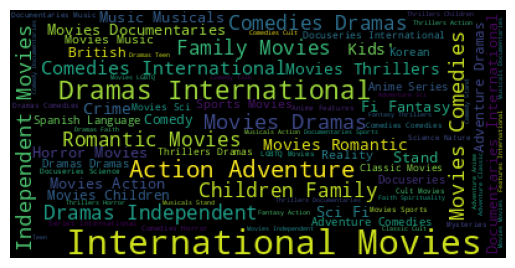

In [ ]:
text = ''
lst = list(df.listed_in.reset_index().values[:,1])
text = ', '.join(lst)

remove_words = set(list(STOPWORDS)+['TV','Shows'])

wc = WordCloud(stopwords=remove_words).generate(text) # Adding 'TV' and 'Shows' to the stopwords
plt.imshow(wc)
plt.axis('off')

plt.show()

**6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

In [ ]:
df_2 = df_1[df_1.release_year >= 2010] # Considering the movie/shows which were released from 2010
df_3 = df_2[['type','date_added_1','release_year','year']].sort_values(by='release_year')
df_3['difference'] = df_3.year - df_3.release_year
df_3.difference.mode()[0]
# Looks like most of the movies are added to netflix in the same year of release

0

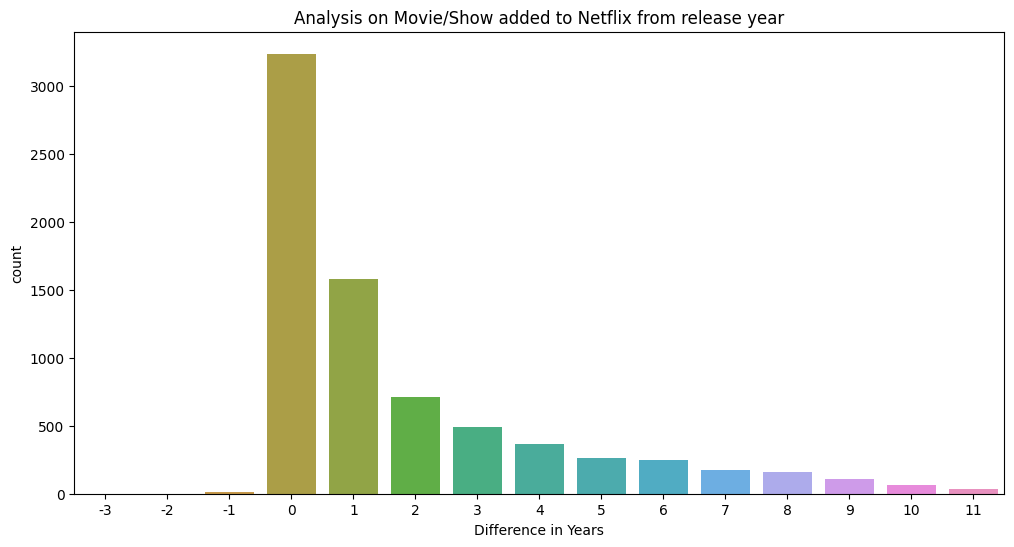

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_3,x='difference')
plt.xlabel('Difference in Years')
plt.title('Analysis on Movie/Show added to Netflix from release year')
plt.show()

In [ ]:
# Insights:
# 1. Year on which most movies/shows got released?
df.release_year.value_counts().head(1)

2018    1147
Name: release_year, dtype: int64

In [ ]:
# 2. Year on which most movies/shows got added to Netflix?
df.date_added.value_counts().head(1)

January 1, 2020    109
Name: date_added, dtype: int64

In [ ]:
# 3. Year on which most movies got released
df[df.type == 'Movie'].release_year.value_counts().head(1)

2017    767
Name: release_year, dtype: int64

In [ ]:
# 4. Year on which most TV Shows got released
df[df.type == 'TV Show'].release_year.value_counts().head(1)

2020    436
Name: release_year, dtype: int64

In [ ]:
# 5. Most rated type
df.rating.value_counts().head(1)

TV-MA    3207
Name: rating, dtype: int64

**Insights:**

*   Based on the provided dataset, most no. of the movies/shows released in the year of 2018.
*   The most no. of movies/shows added to the Netflix on January 1, 2020.
*   In 2017, there are 767 Movies got released and which is the maximum.
*   In 2020, there are 436 TV Shows got released and which is the maximum.
*   Most of the movies/shows are rated as TV-MA which clearly shows that the Netflix is most suitable for the adults (Mature Audience Only.
*   Best time to release Movie is 1st week of the year.
*   Best time to release TV Show is 27th week of the year.

**Recommendations:**

*   In the given dataset, there are plenty of records doesn't have the sufficient information  and I recommend the Netflix team to gather all such information before adding it to their platform. refer below for more clarity:-

    1. There are 2634 records which missing the director information.
    2. There are 831 records which missing the country details.
    3. There are 825 records which missing the cast information.

*   I would recommend to add more movies in the start of the year.
*   I would recommend to add more TV Shows in the middle of the year.
*   There are few movies/shows which had the 'added date' to Netflix before it's release dates and it's weird so, I would strongly recommend to update the correct information.